In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('testcru.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [2]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
my_model_2 = XGBRegressor(n_estimators=1000,learning_rate=0.0895,random_state=0) # Your code here

# Fit the model
my_model_2.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_valid,y_valid)],verbose=False)# Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_valid) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(y_valid,predictions_2) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)



Mean Absolute Error: 16333.53496896404


In [3]:
preds_test=my_model_2.predict(X_test)

In [4]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission5.csv', index=False)

In [3]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,0,1,0,0,0,0,0,0,0,1
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,0,0,0,1,0,0,0,0,1,0
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,0,0,0,1,0,0,0,0,1,0
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
y_valid.head()

Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64

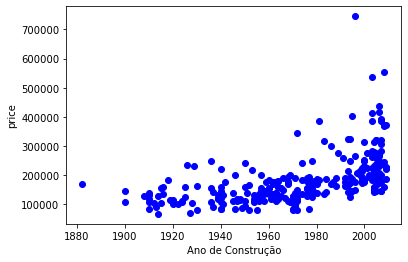

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_valid.YearBuilt,y_valid,color='blue')
plt.xlabel('Ano de Construção')
plt.ylabel('price')
plt.show()

In [16]:
from sklearn import linear_model
import numpy as np
regre = linear_model.LinearRegression()
x_train = np.asanyarray(X_valid[['YearBuilt']])
train_y = np.asanyarray(y_valid)

In [17]:
regre.fit(x_train,train_y)

print("coeficiente: ",regre.coef_)
print('intercept: ',regre.intercept_)

coeficiente:  [1506.74447598]
intercept:  -2791101.0621068976


Text(0, 0.5, 'Price')

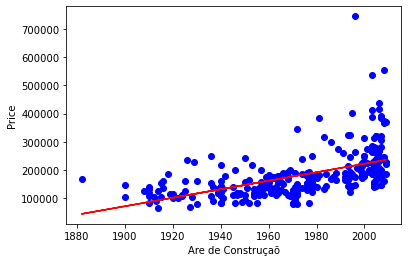

In [20]:
plt.scatter(x_train,train_y,Color= 'blue')
plt.plot(x_train,regre.coef_*x_train+regre.intercept_,'r')
plt.xlabel('Are de Construçaõ')
plt.ylabel('Price')